In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Government of Ontario Finincial Statements for 2017-2018

### (https://data.ontario.ca/dataset/public-accounts-financial-statements-of-government-organizations-and-business-enterprises)

**Software:** Python libraries (pandas, seaborn, matplotlib)

**Intended Audience:**

- General public interested in understanding Ontario's financial health.
- Policymakers and analysts who require a visual overview of key financial metrics.

**Information and Message:**

The visualization aims to:

- Track trends in key financial metrics (assets, liabilities, debt, revenues, expenses) over a period (e.g., past 5 years) to show Ontario's overall financial trajectory.
- Provide a clear and accessible representation of the data for better understanding by various audiences.

**Design Principles:**

- **Substantive:**
    - Choose appropriate chart type (line chart) to show trends and comparisons over time.
    - Clearly label axes and data points.
    - Include a title and legend for context.
- **Perceptual:**
    - Use a readable font and consistent color scheme.
    - Ensure clear data representation (avoid clutter).
    - Consider adding grid lines for better visual reference.
- **Aesthetic:**
    - Use seaborn's default styles for a visually appealing plot.
    - Customize colors or markers if needed for clarity.

**Reproducibility:**

- The code is shared and publicly accessible, allowing others to recreate the visualization using the same data and libraries.
- Downloading the CSV directly within the script ensures the same data source is used, even if the website updates the file.

**Accessibility:**

- The plot avoids using color alone to convey information (consider using patterns or annotations for colorblind viewers).
- Provide clear labels and legends to enhance understanding for diverse audiences.
- If possible, consider alternative text descriptions for the visualization.

**Impacted Individuals and Communities:**

- Citizens concerned about Ontario's financial health and policy decisions.
- Investors and businesses who make decisions based on Ontario's financial stability.
- Policymakers at different levels who understand trends and need to make informed decisions.

**Feature Selection:**

- We chose key financial metrics that represent different aspects of Ontario's financial position: assets, liabilities, debt, revenues, and expenses.
- Other relevant metrics could be included based on specific interests (e.g., specific types of liabilities or expenses).

**Underwater Labor:**

- Downloading and exploring the data.
- Cleaning and preparing the data (handling missing values, inconsistencies).
- Learning and using Python libraries for visualization.
- Iterating on the code and plot design for clarity and aesthetics.



/var/folders/1m/2rr7b3011gg02bt4wxfsr3hc0000gn/T/ipykernel_47077/2953522863.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x='Government_organization', y='Net_assets/(liability)', palette='viridis')


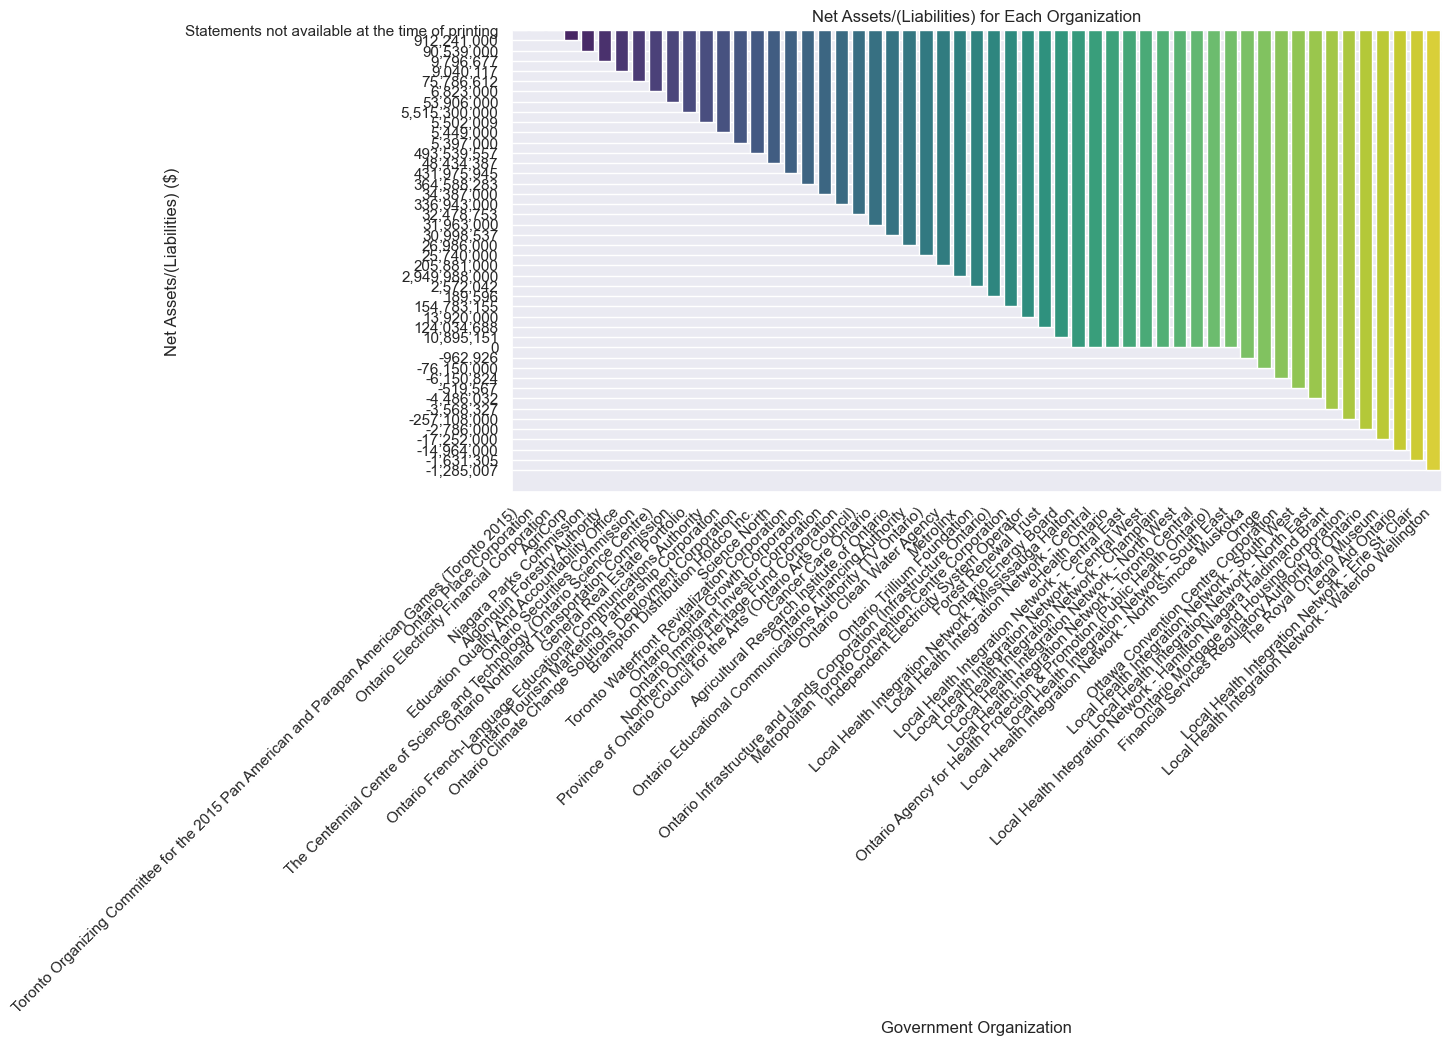

/var/folders/1m/2rr7b3011gg02bt4wxfsr3hc0000gn/T/ipykernel_47077/2953522863.py:36: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


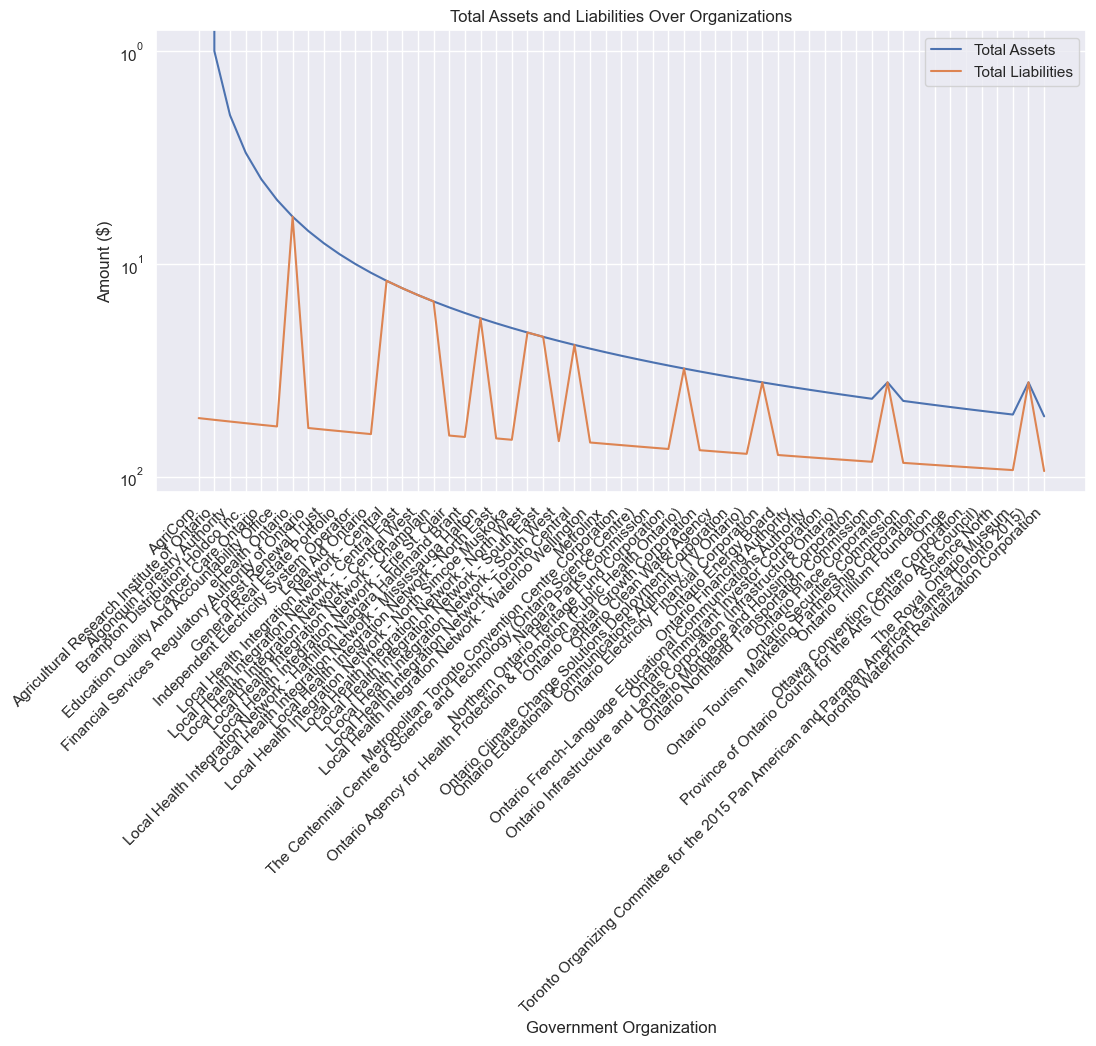

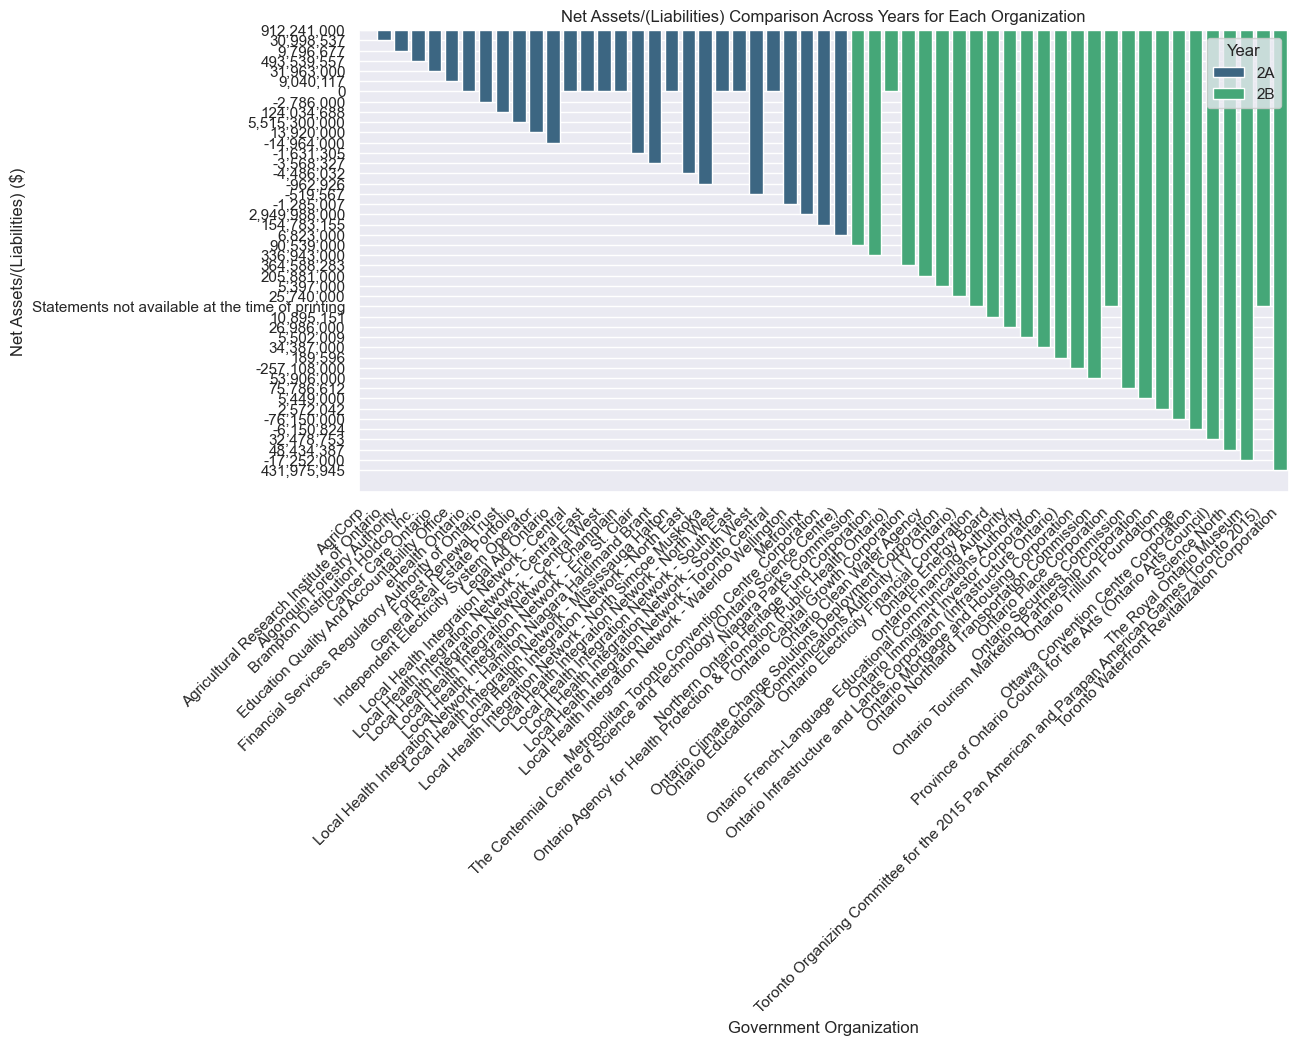

In [118]:
# Load the dataset
df = pd.read_csv('fininicials.csv')

# Clean the data
df.columns = df.columns.str.strip().str.replace(' ', '_')  # Replace spaces with underscores in column names
df.fillna(0, inplace=True)

# Handling cases where Total Liabilities are 0 to avoid division by zero
df.loc[df['Total_liabilities'] == 0, 'Total_liabilities'] = 1  # Replace 0 with 1 to avoid division by zero

# Sort DataFrame by 'Net_assets/(liability)' for Visualization 1
df_sorted = df.sort_values(by='Net_assets/(liability)', ascending=False)

# Set Seaborn style
sns.set_theme()

# Visualization 1: Bar Plot - Net Assets/(Liabilities) for Each Organization
plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted, x='Government_organization', y='Net_assets/(liability)', palette='viridis')
plt.title('Net Assets/(Liabilities) for Each Organization')
plt.xlabel('Government Organization')
plt.ylabel('Net Assets/(Liabilities) ($)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Visualization 2: Line Plot - Total Assets and Liabilities Over Organizations with Logarithmic y-axis
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Government_organization', y='Total_assets', label='Total Assets')
sns.lineplot(data=df, x='Government_organization', y='Total_liabilities', label='Total Liabilities')
plt.title('Total Assets and Liabilities Over Organizations')
plt.xlabel('Government Organization')
plt.ylabel('Amount ($)')
plt.yscale('log')  # Use a logarithmic scale for the y-axis
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Visualization 3: Grouped Bar Plot - Net Assets/(Liabilities) Comparison Across Years
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Government_organization', y='Net_assets/(liability)', hue='Source_volume', palette='viridis')
plt.title('Net Assets/(Liabilities) Comparison Across Years for Each Organization')
plt.xlabel('Government Organization')
plt.ylabel('Net Assets/(Liabilities) ($)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year', loc='upper right')
plt.show()


# Toronto Neighbour crime Data

### (https://open.toronto.ca/dataset/neighbourhood-crime-rates/)

**Software Used:** Python libraries (pandas, seaborn, matplotlib)

**Intended Audience:**

* Who will be viewing your visualizations? (e.g., general public, policymakers, law enforcement)
* Tailor the complexity and data representation based on their understanding.

**Information/Message Conveyed:**

* What insights do you want to reveal? (e.g., crime trends, spatial patterns, comparisons across neighborhoods)
* Choose visualizations that effectively communicate your message.

**Design Principles:**

* **Substantive:** Focus on relevant crime metrics and patterns.
* **Perceptual:** Use color, size, and positioning to highlight key findings.
* **Aesthetic:** Balance visual appeal with clarity and avoid overwhelming viewers.

**Reproducibility:**

* Provide code snippets or scripts for others to recreate your visualizations.
* Use open-source libraries for accessibility.

**Accessibility:**

* Ensure clear labeling, appropriate color choices, and consider alt text for visually impaired users.

**Impact on Individuals/Communities:**

* How can your visualizations inform discussions or decisions about crime prevention and community safety?

**Feature Selection:**

* Choose crime categories and rates based on your goals (e.g., trends over time, comparisons by neighborhood or demographics).

**Underwater Labour:**

* This includes data cleaning, wrangling, and choosing effective visualizations.
* The iterative process of refining your work is crucial for clarity and impact.





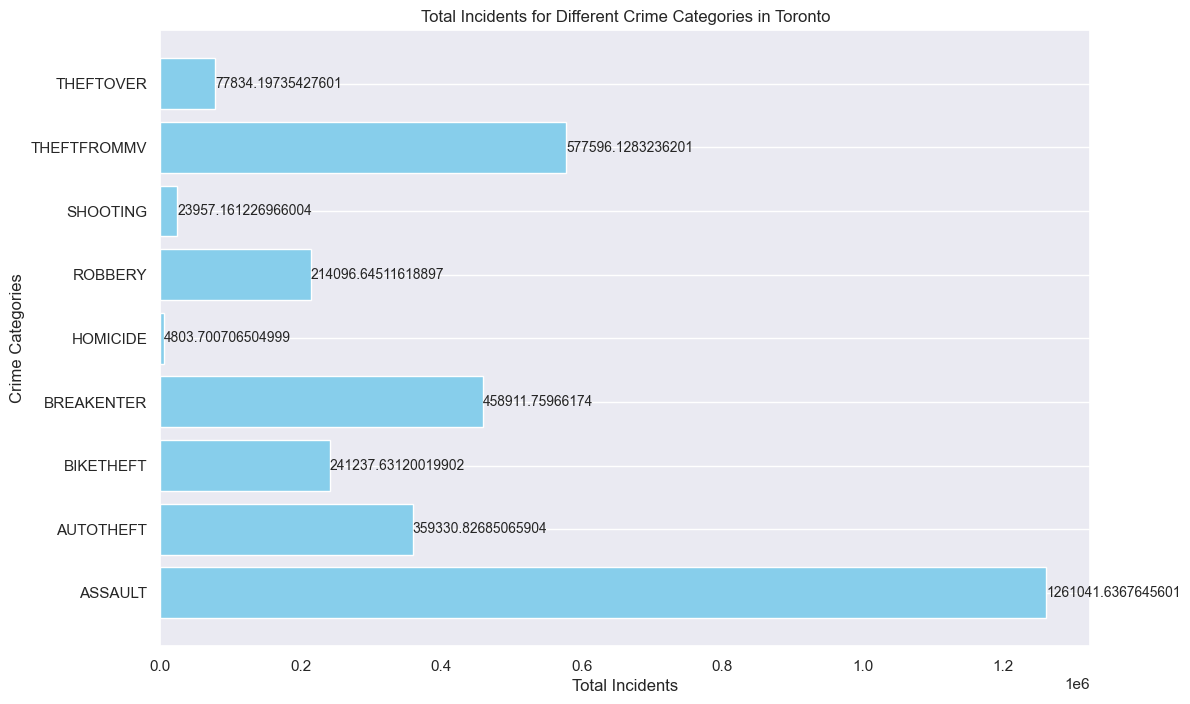

In [119]:

# Load the dataset
df = pd.read_csv("crime_data.csv")

# Data Wrangling and Cleaning
df.drop("_id", axis=1, inplace=True)  # Drop unnecessary column

# Summing up incidents for each crime category
crime_categories = ['ASSAULT', 'AUTOTHEFT', 'BIKETHEFT', 'BREAKENTER', 'HOMICIDE', 'ROBBERY', 'SHOOTING', 'THEFTFROMMV', 'THEFTOVER']
total_incidents = {}

for category in crime_categories:
    total_incidents[category] = df.filter(like=category).sum().sum()

# Creating a horizontal bar plot
plt.figure(figsize=(12, 8))
plt.barh(list(total_incidents.keys()), list(total_incidents.values()), color='skyblue')
plt.title('Total Incidents for Different Crime Categories in Toronto')
plt.xlabel('Total Incidents')
plt.ylabel('Crime Categories')
plt.grid(axis='x')

# Display the value annotations on each bar
for index, value in enumerate(list(total_incidents.values())):
    plt.text(value, index, str(value), va='center', fontsize=10)

plt.show()


/var/folders/1m/2rr7b3011gg02bt4wxfsr3hc0000gn/T/ipykernel_47077/3027626279.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Crime_Rate', y='AREA_NAME', data=top_10_areas, palette=colors)


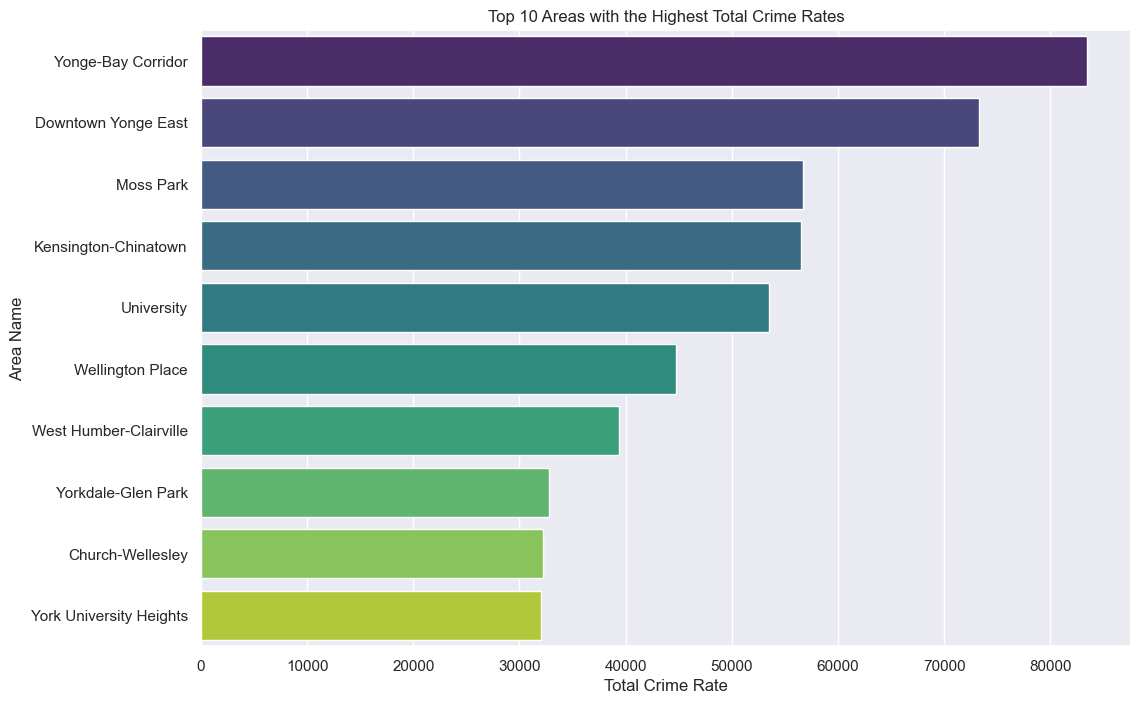

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("crime_data.csv")

# Calculate the total crime rates for each area
crime_rate_columns = df.columns[df.columns.str.contains('_RATE_')].tolist()
df['Total_Crime_Rate'] = df[crime_rate_columns].sum(axis=1)

# Select the top 10 areas with the highest total crime rates
top_10_areas = df.nlargest(10, 'Total_Crime_Rate')

# Define a color palette for the bars
colors = sns.color_palette('viridis', n_colors=len(top_10_areas))

# Plotting the bar plot with separate colors for each bar
plt.figure(figsize=(12, 8))
sns.barplot(x='Total_Crime_Rate', y='AREA_NAME', data=top_10_areas, palette=colors)
plt.title('Top 10 Areas with the Highest Total Crime Rates')
plt.xlabel('Total Crime Rate')
plt.ylabel('Area Name')
plt.show()


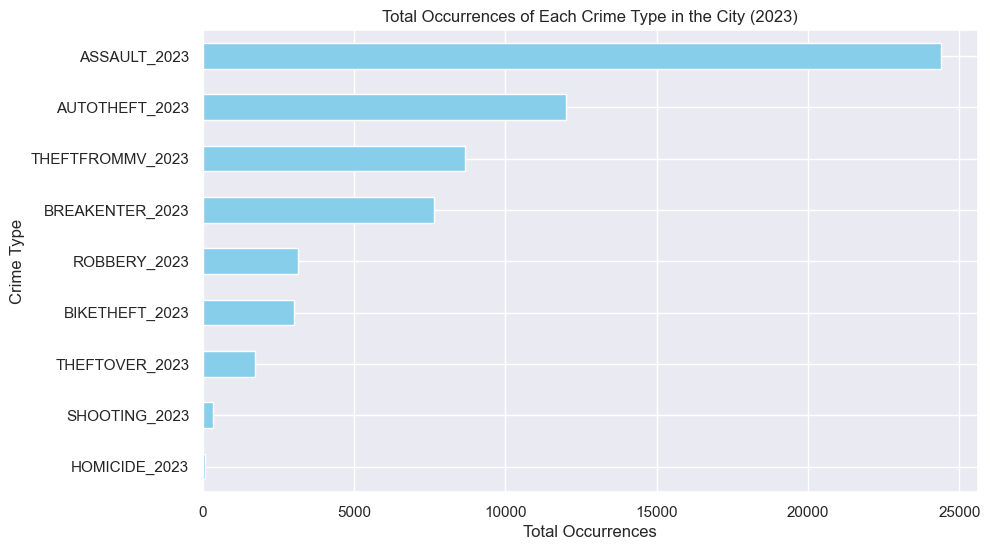

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("crime_data.csv")

# Extract relevant columns for crime types and their occurrences
crime_types = ['ASSAULT', 'AUTOTHEFT', 'BIKETHEFT', 'BREAKENTER', 'HOMICIDE', 'ROBBERY', 'SHOOTING', 'THEFTFROMMV', 'THEFTOVER']
occurrences = df[[f'{crime}_2023' for crime in crime_types]].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
occurrences.sort_values().plot(kind='barh', color='skyblue')
plt.title('Total Occurrences of Each Crime Type in the City (2023)')
plt.xlabel('Total Occurrences')
plt.ylabel('Crime Type')
plt.show()


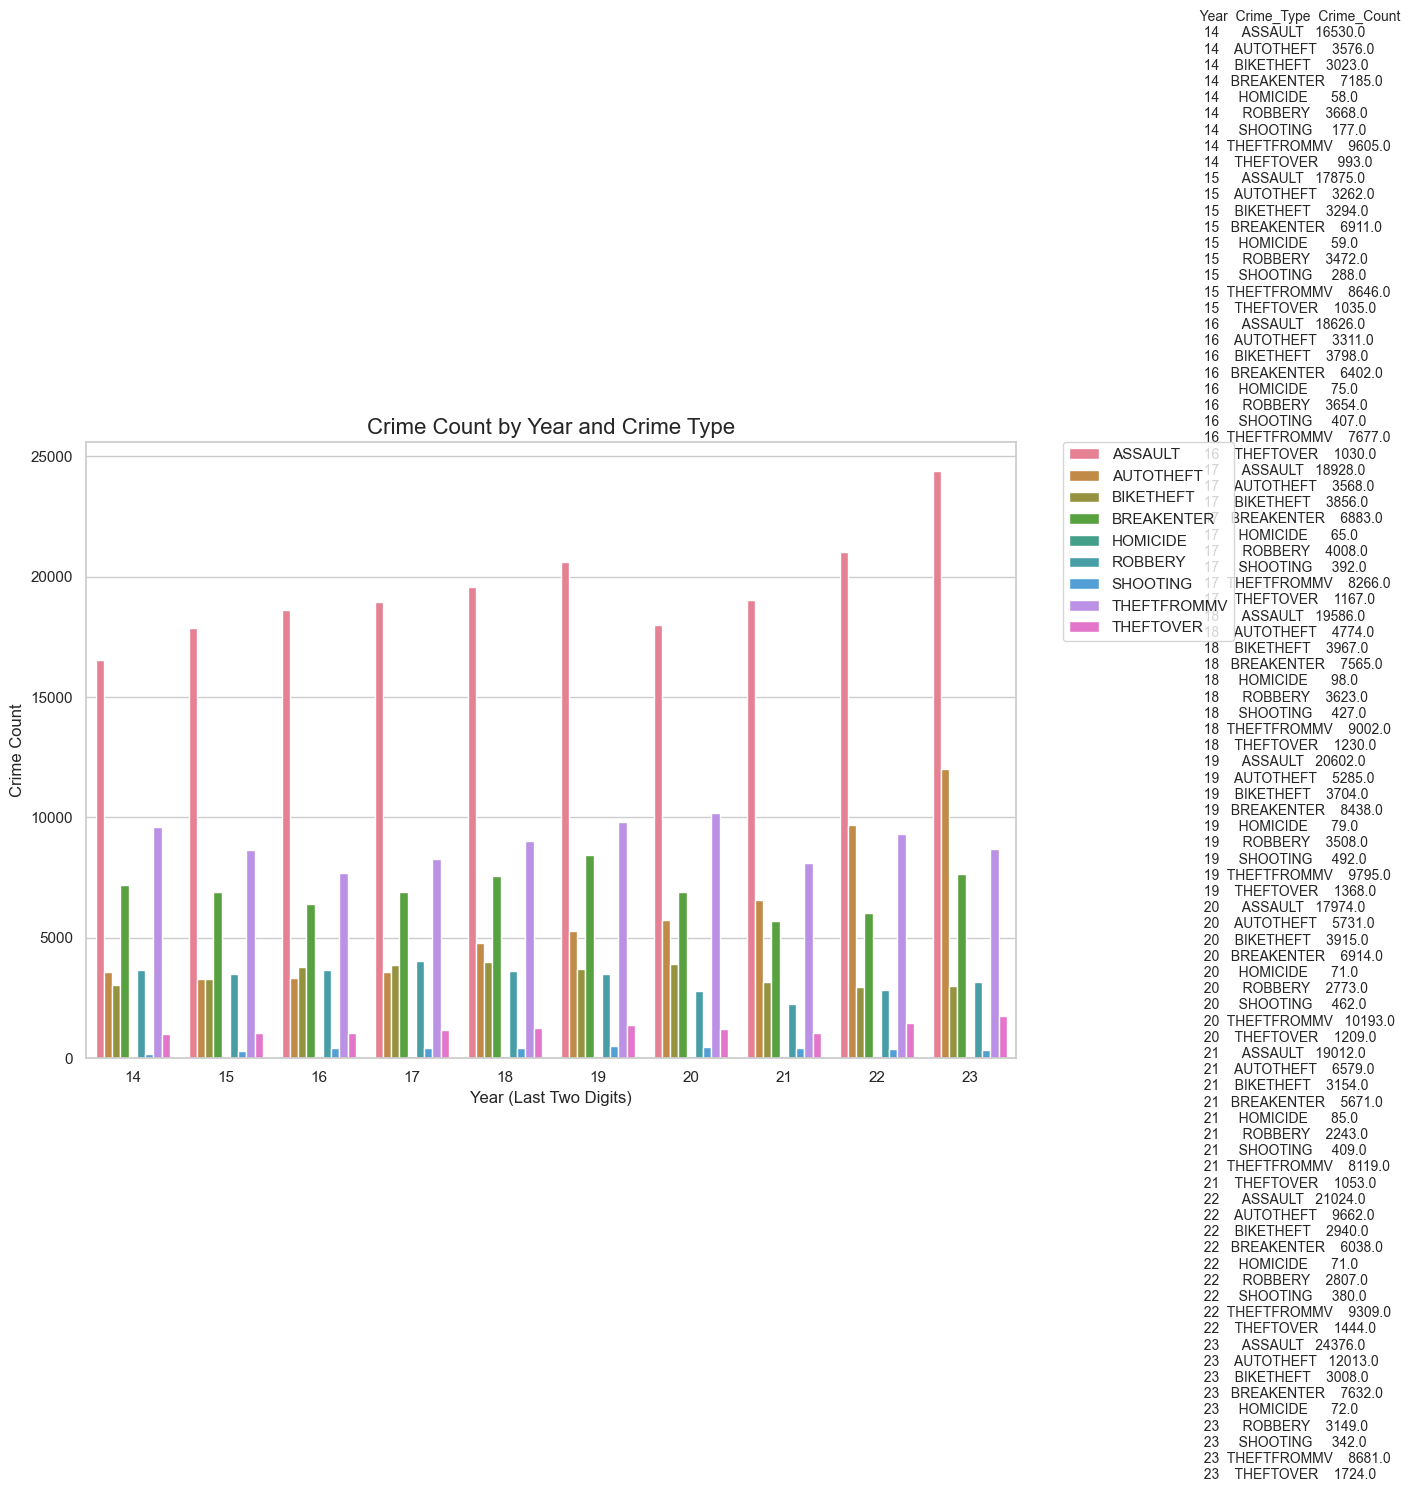

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("crime_data.csv")

# Define the crime types
crime_types = ['ASSAULT', 'AUTOTHEFT', 'BIKETHEFT', 'BREAKENTER', 'HOMICIDE', 'ROBBERY', 'SHOOTING', 'THEFTFROMMV', 'THEFTOVER']

# Create an empty dictionary to store plot data
plot_data = {'Year': [], 'Crime_Type': [], 'Crime_Count': []}

# Iterate through each crime type and each year
for year in range(2014, 2024):
    for crime_type in crime_types:
        # Find the crime count for the current year and crime type
        crime_count = df[f'{crime_type}_{year}'].sum()
        
        # Append the information to the dictionary
        plot_data['Year'].append(year % 100)  # Display only last two digits
        plot_data['Crime_Type'].append(crime_type)
        plot_data['Crime_Count'].append(crime_count)

# Create a DataFrame for plotting
df_plot = pd.DataFrame(plot_data)

# Set Seaborn style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("husl", n_colors=len(crime_types))

# Plot the data using seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Year', y='Crime_Count', hue='Crime_Type', data=df_plot, palette=palette)
plt.title('Crime Count by Year and Crime Type', fontsize=16)
plt.xlabel('Year (Last Two Digits)', fontsize=12)
plt.ylabel('Crime Count', fontsize=12)
plt.legend(title=None, fontsize=10)

# Add data just outside the plot
text_content = df_plot.to_string(index=False, justify='center')
plt.text(1.05, 0.5, text_content, transform=plt.gcf().transFigure, fontsize=10, verticalalignment='center')

# Beautify legend
ax.legend(title=None, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Display the plot
plt.show()
